In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import torch
import torchvision
from PIL import Image
from torch.nn import functional as F
import  torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.datasets.utils import download_url
import math
import datetime
from sklearn.model_selection import train_test_split
from torch import optim

In [68]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
gender_submission = pd.read_csv('./sample_submission.csv')
# test_data = pd.merge(test, gender_submission, how="inner", on="PassengerId")

In [69]:
train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [91]:
int(train[train['Id'] == 'fff19e2ce11718548fa1c5d039a5192a']['Pawpularity'])

20

In [3]:
img_list = {}
mode = 'train'

for img_name in train['Id']:
    img = cv2.imread(mode + '/' + img_name +'.jpg')
    img_list[img_name] = img

In [5]:
size_list = []
for name, img in img_list.items():
    size_list.append(img.shape)

In [71]:
def Resize(img, size):
    height, width, color = img.shape # 画像の縦横サイズを取得

    if height > size[0] or width > size[1]:
        raise print("Size Error")
    
    padding_top = 0
    padding_left = 0
    padding_right = 0
    padding_bottom = 0
        
      # 縦長画像→幅を拡張する
    if height < size[0]:
        height_diffsize = size[0] - height
        # 元画像を中央ぞろえにしたいので、左右に均等に余白を入れる
        padding_top = int(height_diffsize / 2)
        padding_bottom = height_diffsize - padding_top

    if width < size[1]:
        width_diffsize = size[1] - width
        padding_left = int(width_diffsize / 2)
        padding_right = width_diffsize - padding_left
    padding_img = cv2.copyMakeBorder(img, padding_top, padding_bottom, padding_left, padding_right, cv2.BORDER_REPLICATE)

        
    return padding_img

In [72]:
reimg_list = {}
size = [1280, 1280]
# size = list(max(size_list)[0:2])
for name, img in img_list.items():
    inputs = Resize(img, size)
    reimg_list[name] = inputs


KeyboardInterrupt: 

In [98]:
test_list = []
for _, img in reimg_list.items():
        test_list.append(img.shape)
min(test_list)

(1279, 1279, 3)

In [26]:
train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


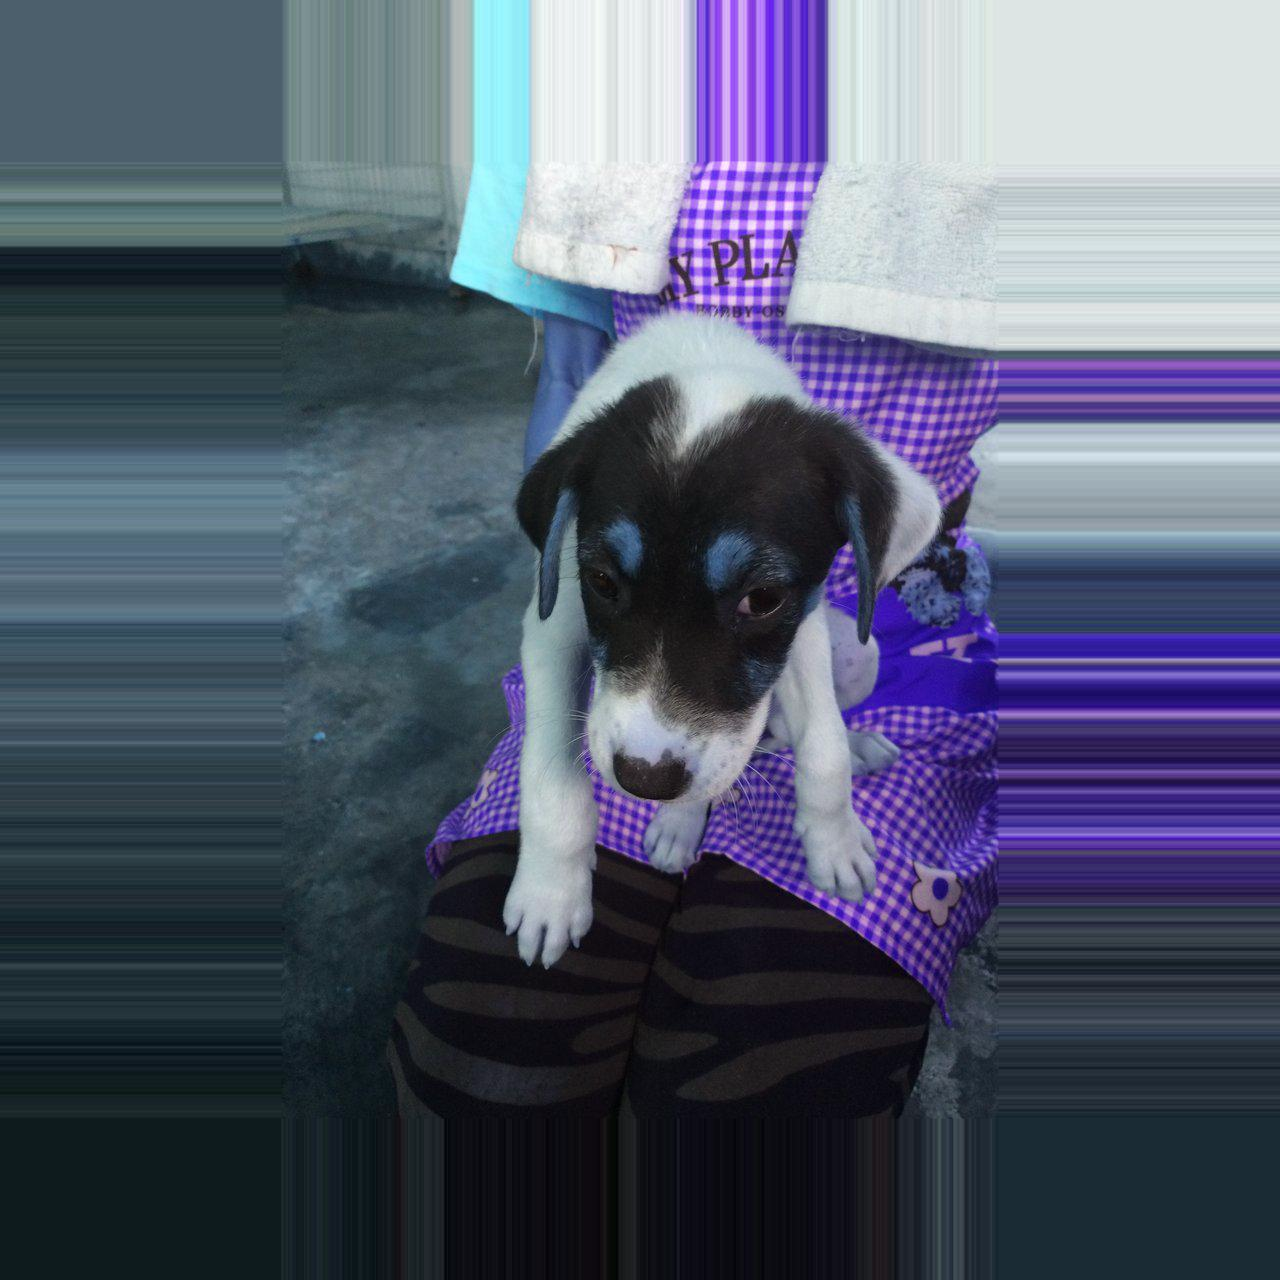

In [77]:
# cv_img = img_list['fff19e2ce11718548fa1c5d039a5192a']
# cv2.imshow("cv_img", cv_img)
mode = 'train'
img_name = 'fff19e2ce11718548fa1c5d039a5192a'
img = cv2.imread(mode + '/' + img_name +'.jpg')
display(Image.fromarray(Resize(img, size)))

In [33]:
# reimg_list[img_name].resize(256, 256)
width = 1280
height = 1280
img2 = cv2.resize(reimg_list[img_name] , (int(256), int(256)))

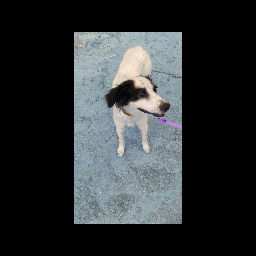

(256, 256, 3)

In [34]:
display(Image.fromarray(img2))
img2.shape

In [8]:
transform = transforms.Compose(
    [
#         transforms.Resize(1280),  # (256, 256) で切り抜く。
#         transforms.CenterCrop(1280),  # 画像の中心に合わせて、(224, 224) で切り抜く
        transforms.ToTensor(),  # テンソルにする。
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # 標準化する。
    ]
)

In [42]:
backImage = transforms.ToPILImage()

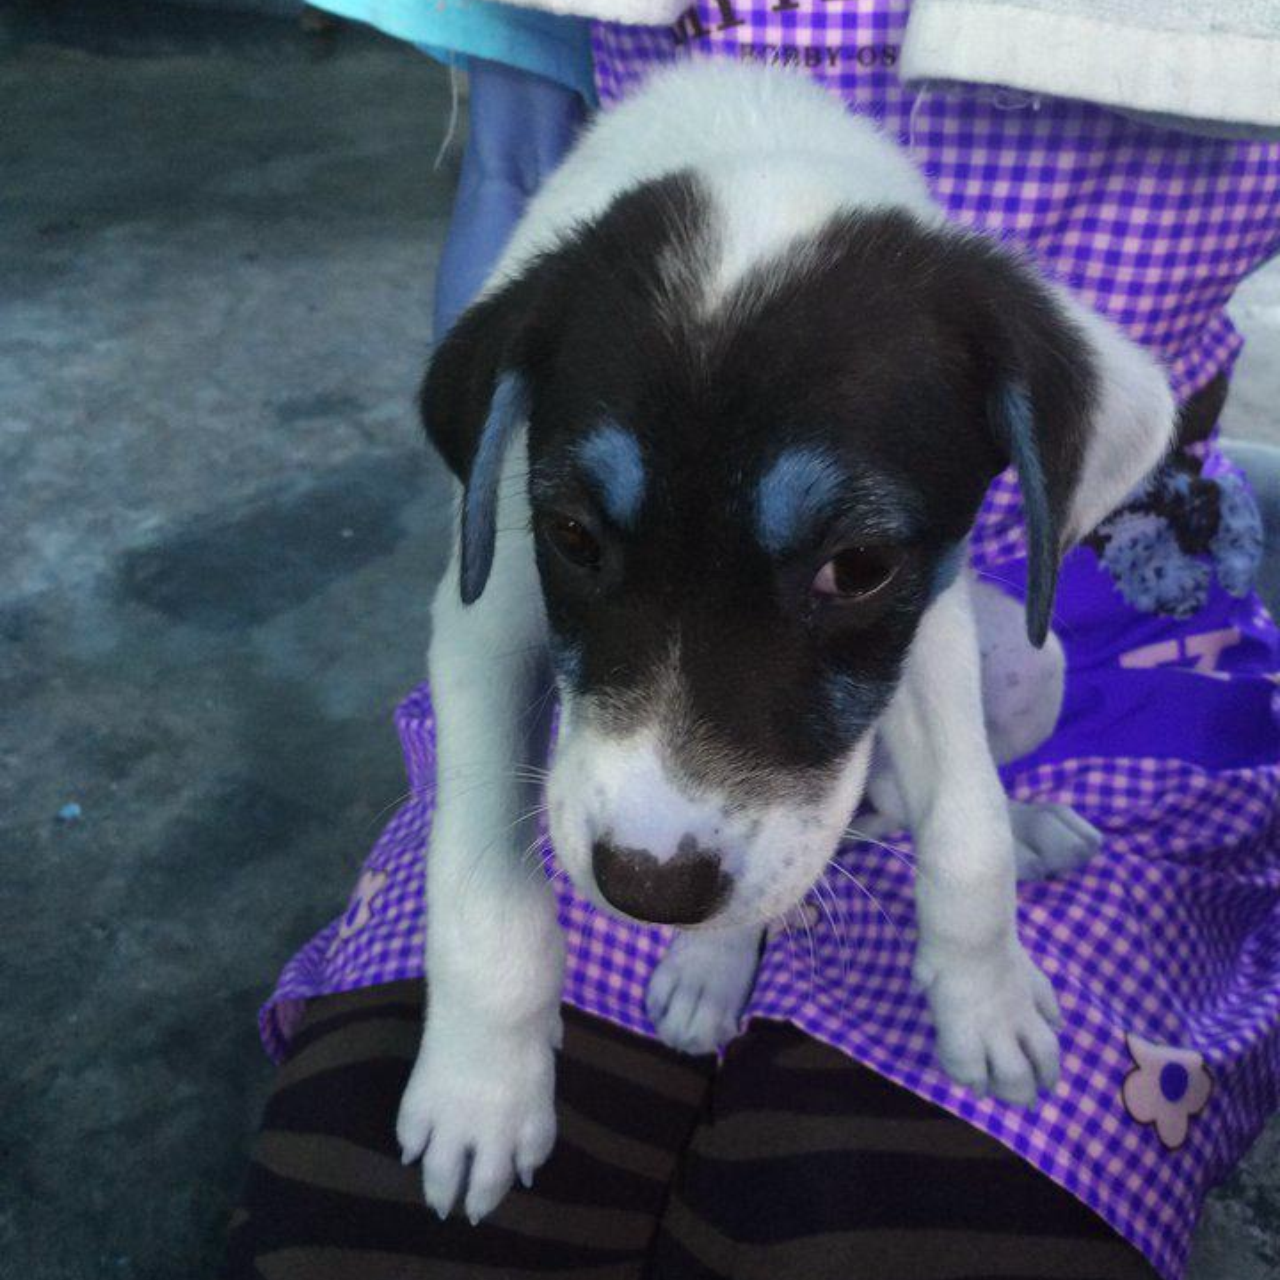

In [52]:
backImage(inputs)

In [48]:
pet_dataloader = PetData(reimg_list, train)

In [49]:

train_data, valid_data = train_test_split(pet_dataloader, test_size=0.1)

In [50]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True)

In [47]:
class PetData(torch.utils.data.Dataset):
    def __init__(self, data, train_csv):
        self.data = data
        self.index = list(data.keys())
        self.train_csv = train_csv
    def __len__(self):
        return self.data.__len__()

    def __getitem__(self, idx):
        Id = self.index[idx]
        correct = torch.tensor(self.train_csv[self.train_csv['Id'] == Id]['Pawpularity'].to_numpy())
        return self.data[Id], correct

In [24]:
device='cuda:0'

In [37]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = (7, 8), stride = (2, 2), bias=False)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = (3, 3), stride = (2, 2), bias=False)
        self.fc1 = nn.Linear(14208, 150)
        self.fc2 = nn.Linear(150, 1)
    def size(self, hin, win, dilation, padding, kernel_size, stride):
        hout = math.floor((hin + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
        wout = math.floor((win + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)
        return hout, wout
    
    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = torch.relu(self.conv2(out))
        out = out.reshape(32, -1)
        print(out.shape)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [32]:
# https://support.dl.sony.com/docs-ja/%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB%EF%BC%9A%E5%85%A5%E5%8A%9B%E7%94%BB%E5%83%8F%E3%82%92%E5%85%83%E3%81%AB%E9%80%A3%E7%B6%9A%E5%80%A4%E3%82%92%E6%8E%A8%E5%AE%9A%E3%81%99/

In [33]:
def train(n_epochs, optimizer, model, loss_fn, train_data, valid_data, batch_size):
    for epoch in range(1, n_epochs + 1):
            train_loss_sum = 0.0
            train_accuracy_sum = 0
            train_cnt = 0
            
            model.train()
            
            for imgs, labels in train_data:
                print(imgs.shape)
                imgs = torch.from_numpy(imgs).to(device=device, dtype=torch.float)
                labels = labels.to(device=device)
                optimizer.zero_grad()
                outputs = model(imgs)
                loss = loss_fn(outputs, labels)
                loss.backword()
                optimizer.step()
                train_loss_sum += loss.item()
                train_cnt += labels.shape()
            
            model.eval()
            val_loss_sum = 0.0
            val_accuracy_sum = 0
            val_cnt = 0
            
            with torch.no_grad():
                for imgs, labels in valid_data:
                    imgs = imgs.to(device=device, dtype=torch.float)
                    labels = labels.to(device=device)
                    outputs = model(imgs)
                    loss = loss_fn(outputs, labels)
                    val_loss_sum += loss.item()
                    val_cnt += labels.shape()
            print('{} Epoch : {:>4}, Train Loss : {:.8f}, Val Loss : {:.8f}'.format(datetime.datetime.now(), epoch, train_loss, val_loss))

In [40]:
model = NeuralNet().to(device=device)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr)
loss_fn = nn.MSELoss()
train(100, optimizer, model, loss_fn, train_dataloader, valid_dataloader, 16)

torch.Size([32, 1280, 1280, 3])


TypeError: expected np.ndarray (got Tensor)

In [52]:
for imgs, labels in train_dataloader:
    print(labels.shape[0])
    input()

32


KeyboardInterrupt: Interrupted by user

In [62]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = (7, 8), stride = (2, 2), bias=False)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = (3, 3), stride = (2, 2), bias=False)
        self.fc1 = nn.Linear(123008, 150)
        self.fc2 = nn.Linear(150, 1)
        self.dropout1 = torch.nn.Dropout2d(p=0.3)
        self.dropout2 = torch.nn.Dropout(p=0.3)

    def size(self, hin, win, dilation, padding, kernel_size, stride):
        hout = math.floor((hin + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
        wout = math.floor((win + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)
        return hout, wout
    
    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = torch.relu(self.conv2(out))
        out = self.dropout1(out)
        # out = out.reshape(out.shape[0], -1)
        out = out.view(out.shape[0], -1)
        print(out.shape)
        out = torch.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out
model = NeuralNet()

In [63]:
from torchinfo import summary

In [64]:
print(summary(model, input_size=(32, 3, 512, 512)))

torch.Size([32, 508032])
Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                --                        --
├─Conv2d: 1-1                            [32, 16, 253, 253]        2,688
├─Conv2d: 1-2                            [32, 32, 126, 126]        4,608
├─Dropout2d: 1-3                         [32, 32, 126, 126]        --
├─Linear: 1-4                            [32, 150]                 18,451,350
├─Dropout: 1-5                           [32, 150]                 --
├─Linear: 1-6                            [32, 1]                   151
Total params: 18,458,797
Trainable params: 18,458,797
Non-trainable params: 0
Total mult-adds (G): 8.44
Input size (MB): 100.66
Forward/backward pass size (MB): 392.28
Params size (MB): 73.84
Estimated Total Size (MB): 566.77


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import torch
import torchvision
from PIL import Image
from torch.nn import functional as F
import  torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.datasets.utils import download_url
import math
import datetime
from sklearn.model_selection import train_test_split
from torch import optim

device='cuda:0'

class PetData(torch.utils.data.Dataset):
    def __init__(self, data, train_csv):
        self.data = data
        self.index = list(data.keys())
        self.train_csv = train_csv

    def __len__(self):
        return self.data.__len__()

    def __getitem__(self, idx):
        Id = self.index[idx]
        correct = torch.tensor(self.train_csv[self.train_csv['Id'] == Id]['Pawpularity'].to_numpy())
        return self.data[Id], correct

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = (7, 8), stride = (2, 2), bias=False)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = (3, 3), stride = (2, 2), bias=False)
        self.fc1 = nn.Linear(3235968, 150)
        self.fc2 = nn.Linear(150, 1)
    def size(self, hin, win, dilation, padding, kernel_size, stride):
        hout = math.floor((hin + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
        wout = math.floor((win + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)
        return hout, wout
    
    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = torch.relu(self.conv2(out))
        out = out.reshape(32, -1)
        print(out.shape)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

def train(n_epochs, optimizer, model, loss_fn, train_data, valid_data, batch_size):
    for epoch in range(1, n_epochs + 1):
            train_loss_sum = 0.0
            train_accuracy_sum = 0
            train_cnt = 0
            
            model.train()
            
            for imgs, labels in train_data:
                
                imgs = torch.reshape(imgs, (-1, 3, 1280, 1280)).to(device=device, dtype=torch.float)
                labels = labels.to(device=device)
                optimizer.zero_grad()
                outputs = model(imgs)
                loss = loss_fn(outputs, labels)
                loss.backword()
                optimizer.step()
                train_loss_sum += loss.item()
                train_cnt += labels.shape()
                
            
            model.eval()
            val_loss_sum = 0.0
            val_accuracy_sum = 0
            val_cnt = 0
            
            with torch.no_grad():
                for imgs, labels in valid_data:
                    imgs = torch.reshape(imgs, (-1, 3, 1280, 1280)).to(device=device, dtype=torch.float)
                    labels = labels.to(device=device)
                    outputs = model(imgs)
                    loss = loss_fn(outputs, labels)
                    val_loss_sum += loss.item()
                    val_cnt += labels.shape()
            print('{} Epoch : {:>4}, Train Loss : {:.8f}, Val Loss : {:.8f}'.format(datetime.datetime.now(), epoch, train_loss, val_loss))

def Resize(img, size):
    height, width, color = img.shape # 画像の縦横サイズを取得

    if height > size[0] or width > size[1]:
        raise print("Size Error")
    
    padding_top = 0
    padding_left = 0
    padding_right = 0
    padding_bottom = 0
        
      # 縦長画像→幅を拡張する
    if height < size[0]:
        height_diffsize = size[0] - height
        # 元画像を中央ぞろえにしたいので、左右に均等に余白を入れる
        padding_top = int(height_diffsize / 2)
        padding_bottom = height_diffsize - padding_top

    if width < size[1]:
        width_diffsize = size[1] - width
        padding_left = int(width_diffsize / 2)
        padding_right = width_diffsize - padding_left
    padding_img = cv2.copyMakeBorder(img, padding_top, padding_bottom, padding_left, padding_right, cv2.BORDER_CONSTANT, (0, 0, 0))

        
    return padding_img



def main():

    print("Load Data")
    train_csv = pd.read_csv('./train.csv')
    test_csv = pd.read_csv('./test.csv')
    gender_submission = pd.read_csv('./sample_submission.csv')
    # test_data = pd.merge(test, gender_submission, how="inner", on="PassengerId")

    img_list = {}
    mode = 'train'
    size = [1280, 1280]

    print("Load Image Data")
    for img_name in train_csv['Id']:
        img = cv2.imread(mode + '/' + img_name +'.jpg')
        img_list[img_name] = Resize(img, size)
    
    print("Formatting Data")
    pet_dataloader = PetData(img_list, train_csv)
    train_data, valid_data = train_test_split(pet_dataloader, test_size=0.1)
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
    valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True) 


    model = NeuralNet().to(device=device)
    lr = 1e-3
    optimizer = optim.Adam(model.parameters(), lr)
    loss_fn = nn.MSELoss()

    print("Start Train")
    train(100, optimizer, model, loss_fn, train_dataloader, valid_dataloader, 16)


if __name__ == '__main__':
    main()

Load Data
Load Image Data
Formatting Data
Start Train
torch.Size([32, 3235968])


AttributeError: 'Tensor' object has no attribute 'backword'

In [65]:
def test():
    return 0, 1
a = test()

In [66]:
a[0]

0

In [67]:
a[1]

1

In [3]:
from torchvision import models
t = models.resnet50()

In [4]:
t

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 